In [2]:
from google.colab import files

uploaded = files.upload()


Saving co2-data-master.zip to co2-data-master.zip


In [4]:
print(uploaded.keys())  # Uploaded file name dekhar jonno


dict_keys(['co2-data-master.zip'])


In [5]:
import zipfile

zip_path = "/content/co2-data-master.zip"  # Corrected path
extract_path = "/content/co2-data-master"  # Extracted folder location

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzip complete!")


✅ Unzip complete!


In [6]:
import os

print(os.listdir("/content/co2-data-master"))  # Extracted folder er contents dekhar jonno


['co2-data-master']


In [8]:
import os

folder_path = "/content/co2-data-master"  # Extracted folder path
print(os.listdir(folder_path))  # Folder er sob file dekhabe


['co2-data-master']


In [9]:
import os

folder_path = "/content/co2-data-master"

# Folder er vitore sob file & subfolder dekhar jonno
for root, dirs, files in os.walk(folder_path):
    print(f"📂 Folder: {root}")
    for file in files:
        print(f"  📄 File: {file}")


📂 Folder: /content/co2-data-master
📂 Folder: /content/co2-data-master/co2-data-master
  📄 File: owid-co2-data.csv
  📄 File: .gitignore
  📄 File: README.md
  📄 File: owid-co2-codebook.csv


In [10]:
import pandas as pd

df = pd.read_csv("/content/co2-data-master/co2-data-master/owid-co2-data.csv")
print(df.head())  # First few rows
print(df.info())  # Column info & missing values


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

In [11]:
import pandas as pd

# CO2 ডেটা লোড করা
df = pd.read_csv('/content/co2-data-master/co2-data-master/owid-co2-data.csv')

# ডেটাসেটের প্রথম কয়েকটি সারি দেখুন
df.head()


country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   
2                     NaN                                   NaN   
3                     NaN                                   NaN   
4                     NaN                                   NaN   

   temperature_change_from_ch4  temperature_change_from_co2  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                          NaN                          NaN        NaN   
1                          NaN                          NaN        NaN   
2                          NaN                          NaN        NaN   
3                          NaN                          NaN        NaN   
4                          NaN                          NaN        NaN   

   total_ghg_excluding_lucf  trade_co2  trade_co2_share  
0                       NaN        NaN              NaN  
1                       NaN        NaN              NaN  
2                       NaN        NaN              NaN  
3                       NaN        NaN              NaN  
4                       NaN        NaN              NaN  

[5 rows x 79 columns]

In [13]:
# লক্ষ্য এবং ফিচার আলাদা করা
X = df[['gdp', 'population', 'cement_co2', 'year']]  # ফিচার সিলেক্ট করা
y = df['co2']  # লক্ষ্য কলাম


In [14]:
# নাল মান দূর করা (যদি থাকে)
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# ডেটা ট্রেন এবং টেস্ট সেটে ভাগ করা
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ফিচারগুলো স্ট্যান্ডার্ডাইজ করা
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLPRegressor মডেল তৈরি করা (ANN এর জন্য)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_accuracy = mlp_model.score(X_test, y_test)

# LinearRegression মডেল তৈরি করা
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_accuracy = linreg_model.score(X_test, y_test)

# Accuracy প্রিন্ট করা
print(f"MLPRegressor মডেলের R^2 Score: {mlp_accuracy:.2f}")
print(f"LinearRegression মডেলের R^2 Score: {linreg_accuracy:.2f}")


MLPRegressor মডেলের R^2 Score: 0.74
LinearRegression মডেলের R^2 Score: 0.56


In [17]:
# MLPRegressor মডেল ট্রেনিং
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42, verbose=True)
mlp_model.fit(X_train, y_train)


Iteration 1, loss = 1210081.98769140
Iteration 2, loss = 1203343.99480837
Iteration 3, loss = 1187928.32289660
Iteration 4, loss = 1162310.62783257
Iteration 5, loss = 1130420.63693008
Iteration 6, loss = 1092657.07109541
Iteration 7, loss = 1050531.41188224
Iteration 8, loss = 1006858.02011608
Iteration 9, loss = 962138.17624165
Iteration 10, loss = 917605.60660890
Iteration 11, loss = 874803.19705665
Iteration 12, loss = 833489.78423994
Iteration 13, loss = 793335.98963470
Iteration 14, loss = 755173.46882185
Iteration 15, loss = 719649.71411576
Iteration 16, loss = 686920.64476684
Iteration 17, loss = 656673.17665579
Iteration 18, loss = 628668.93303036
Iteration 19, loss = 603216.06729664
Iteration 20, loss = 580036.47122431
Iteration 21, loss = 559454.55326415
Iteration 22, loss = 541354.63646579
Iteration 23, loss = 525537.01680708
Iteration 24, loss = 512065.66684989
Iteration 25, loss = 500882.05889703
Iteration 26, loss = 491761.34687824
Iteration 27, loss = 484411.47608016
It

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42,
             verbose=True)

In [18]:
# নতুন ফিচার সিলেকশন ট্রাই করা
X = df[['population', 'gdp', 'year', 'cement_co2']]  # প্রয়োজনীয় ফিচার ঠিক করুন


In [19]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # লেয়ার সংখ্যা ও নিউরন সংখ্যা পরিবর্তন
    activation='relu',  # 'tanh' বা 'logistic' ব্যবহার করে দেখতে পারেন
    solver='adam',  # 'sgd' বা 'lbfgs' দিয়ে চেষ্টা করতে পারেন
    alpha=0.001,  # রেগুলারাইজেশন হাইপারপ্যারামিটার (কমালে ওভারফিটিং কম হবে)
    max_iter=1000,
    random_state=42
)


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

print(f"RandomForest মডেলের R^2 Score: {rf_score:.2f}")


RandomForest মডেলের R^2 Score: 0.74


In [22]:
df_cleaned = df.dropna()  # NaN থাকা সব সারি বাদ দিয়ে নতুন ডেটাসেট তৈরি করা

# নতুন ডেটাসেট ব্যবহার করা
X = df_cleaned[['population', 'gdp', 'year', 'cement_co2']]  # প্রয়োজনীয় ফিচার ঠিক করুন
y = df_cleaned['co2']  # টার্গেট ভেরিয়েবল


In [26]:
df_cleaned = df.dropna()  # NaN থাকা সব সারি বাদ দিয়ে নতুন ডেটাসেট তৈরি করা

# নতুন ডেটাসেট ব্যবহার করা
X = df_cleaned[['population', 'gdp', 'year', 'cement_co2']]  # প্রয়োজনীয় ফিচার ঠিক করুন
y = df_cleaned['co2']  # টার্গেট ভেরিয়েবল


In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'median' বা 'most_frequent' ব্যবহার করতে পারেন

X_imputed = imputer.fit_transform(X)  # NaN ভ্যালুগুলো রিপ্লেস করা


In [29]:
print(X.isnull().sum())  # কোন কোন কলামে NaN আছে তা দেখাবে


population    0
gdp           0
year          0
cement_co2    0
dtype: int64


In [30]:
X = X.dropna()  # সব NaN সারি বাদ
y = y.loc[X.index]  # y ডেটাও একইভাবে ফিল্টার করা


In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'median' বা 'most_frequent' ব্যবহার করা যায়
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [32]:
print(y.isnull().sum())  # target variable-এ NaN আছে কিনা দেখুন


0


In [33]:
imputer = SimpleImputer(strategy='mean')  # 'median' বা 'most_frequent' ব্যবহার করা যেতে পারে
y = imputer.fit_transform(y.values.reshape(-1, 1))  # target variable-এ NaN পূর্ণ করুন
y = y.flatten()  # target variable কে সোজা আকারে পরিণত করুন


In [35]:
from sklearn.impute import SimpleImputer

# Imputer ব্যবহার করে NaN পূরণ করুন
imputer = SimpleImputer(strategy='mean')  # mean, median বা most_frequent ব্যবহার করা যায়
X_test_imputed = imputer.fit_transform(X_test)  # X_test এর NaN পূর্ণ করুন


In [36]:
X_test = X_test.dropna()  # NaN থাকা সারি বাদ দিন
y_test = y_test.loc[X_test.index]  # y_test থেকে একই ইনডেক্সের সারি ফিল্টার করুন


In [37]:
# NaN চেক করুন
print(X_test.isnull().sum())  # X_test-এ NaN থাকলে জানাবে
print(y_test.isnull().sum())  # y_test-এ NaN থাকলে জানাবে



population    0
gdp           0
year          0
cement_co2    0
dtype: int64
0


In [38]:
from sklearn.preprocessing import StandardScaler

# X_test-এর স্কেলিং ঠিক করা
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # X_test স্কেল করা


In [41]:
from sklearn.impute import SimpleImputer

# NaN মান পূর্ণ করার জন্য SimpleImputer ব্যবহার করা
imputer = SimpleImputer(strategy='mean')  # mean দ্বারা NaN পূর্ণ করা
X_train = imputer.fit_transform(X_train)  # X_train-এ NaN পূর্ণ করা
X_test = imputer.transform(X_test)  # X_test-এ NaN পূর্ণ করা


In [43]:
from sklearn.impute import SimpleImputer

# NaN মান পূর্ণ করার জন্য SimpleImputer ব্যবহার করা
imputer = SimpleImputer(strategy='mean')  # mean দ্বারা NaN পূর্ণ করা
X_train = imputer.fit_transform(X_train)  # X_train-এ NaN পূর্ণ করা
X_test = imputer.transform(X_test)  # X_test-এ NaN পূর্ণ করা


In [45]:
import pandas as pd

# X_train এবং y_train কে DataFrame এ রূপান্তর করুন
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

# NaN মান সহ সারি বাদ দেওয়া
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()


In [46]:
# Linear Regression মডেল ফিট করুন
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Random Forest মডেল ফিট করুন
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting মডেল ফিট করুন
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# MLPRegressor মডেল ফিট করুন (ANN)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# মডেলের স্কোর বের করুন
linreg_score = linreg.score(X_test, y_test)
rf_score = rf.score(X_test, y_test)
gbr_score = gbr.score(X_test, y_test)
mlp_score = mlp.score(X_test, y_test)

# স্কোর প্রিন্ট করুন
print(f"Linear Regression R^2 Score: {linreg_score:.2f}")
print(f"Random Forest R^2 Score: {rf_score:.2f}")
print(f"Gradient Boosting R^2 Score: {gbr_score:.2f}")
print(f"MLPRegressor (ANN) R^2 Score: {mlp_score:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Regression R^2 Score: 0.90
Random Forest R^2 Score: 0.99
Gradient Boosting R^2 Score: 0.98
MLPRegressor (ANN) R^2 Score: -43279464.40


In [47]:
from sklearn.ensemble import VotingRegressor

# Models
models = [
    ('linreg', linreg),
    ('rf', rf),
    ('gbr', gbr),
    ('mlp', mlp)
]

# Voting Regressor
voting_regressor = VotingRegressor(estimators=models)

# Train the model
voting_regressor.fit(X_train, y_train)

# Calculate R² score
voting_score = voting_regressor.score(X_test, y_test)
print(f"Voting Regressor R² Score: {voting_score:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_voting.py:698: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Voting Regressor R² Score: -2705109.31


In [49]:
# 1D array এ রূপান্তর করুন
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Voting Regressor ট্রেন করুন
voting_regressor.fit(X_train, y_train)

# R² স্কোর বের করুন
voting_score = voting_regressor.score(X_test, y_test)
print(f"Voting Regressor R² Score: {voting_score:.2f}")


Voting Regressor R² Score: -2705109.31


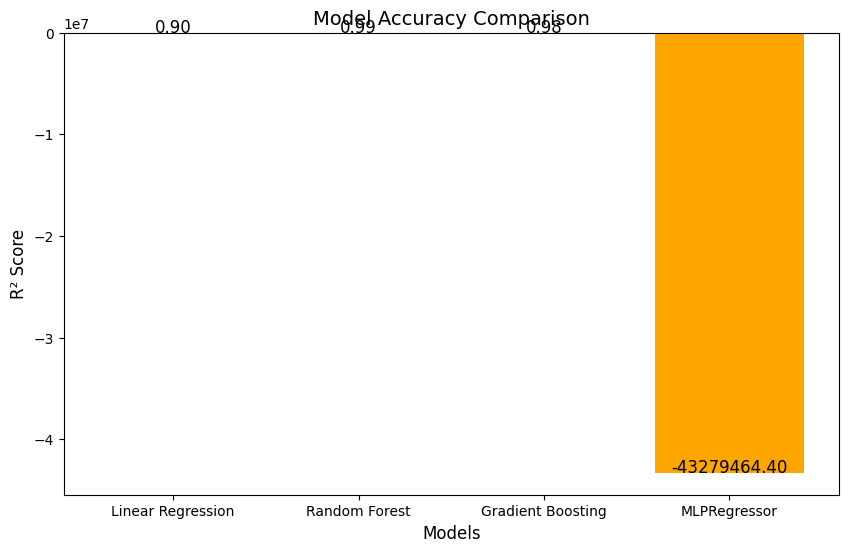

In [50]:
import matplotlib.pyplot as plt

# মডেলগুলির নাম এবং স্কোরের মান
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'MLPRegressor']
scores = [linreg_score, rf_score, gbr_score, mlp_score]  # মডেলগুলির R² স্কোর

# গ্রাফ তৈরি করা
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'orange'])

# গ্রাফের শিরোনাম এবং লেবেল
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)

# স্কোরগুলোর মান গ্রাফে দেখানো
for i in range(len(models)):
    plt.text(i, scores[i] + 0.01, f'{scores[i]:.2f}', ha='center', fontsize=12)

# গ্রাফ দেখানো
plt.show()


In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Models
models = [
    ('linreg', linreg),
    ('rf', rf),
    ('gbr', gbr),
    ('mlp', mlp)
]

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=models, final_estimator=LinearRegression())

# Train the model
stacking_regressor.fit(X_train, y_train)

# Calculate R² score
stacking_score = stacking_regressor.score(X_test, y_test)
print(f"Stacking Regressor R² Score: {stacking_score:.2f}")


Stacking Regressor R² Score: 0.99


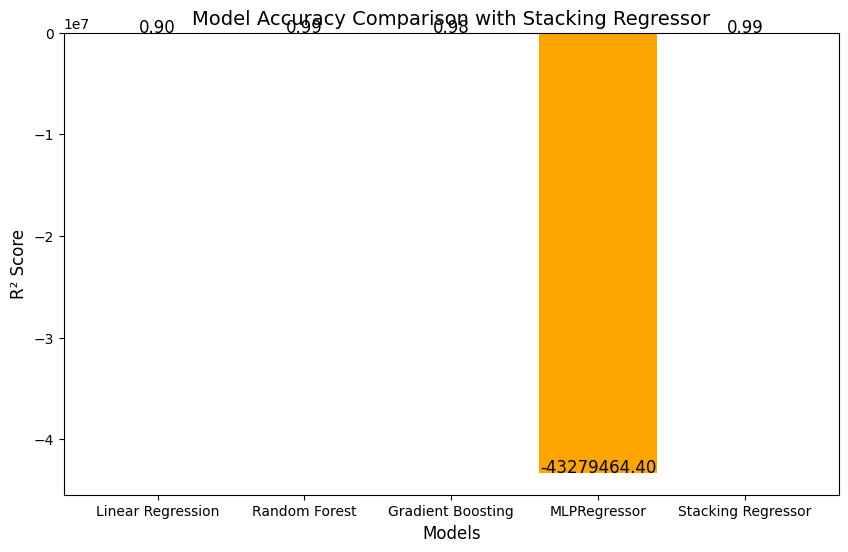

In [52]:
import matplotlib.pyplot as plt

# মডেলগুলির নাম এবং স্কোরের মান
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'MLPRegressor', 'Stacking Regressor']
scores = [linreg_score, rf_score, gbr_score, mlp_score, stacking_score]  # মডেলগুলির R² স্কোর

# গ্রাফ তৈরি করা
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'orange', 'purple'])

# গ্রাফের শিরোনাম এবং লেবেল
plt.title('Model Accuracy Comparison with Stacking Regressor', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)

# স্কোরগুলোর মান গ্রাফে দেখানো
for i in range(len(models)):
    plt.text(i, scores[i] + 0.01, f'{scores[i]:.2f}', ha='center', fontsize=12)

# গ্রাফ দেখানো
plt.show()


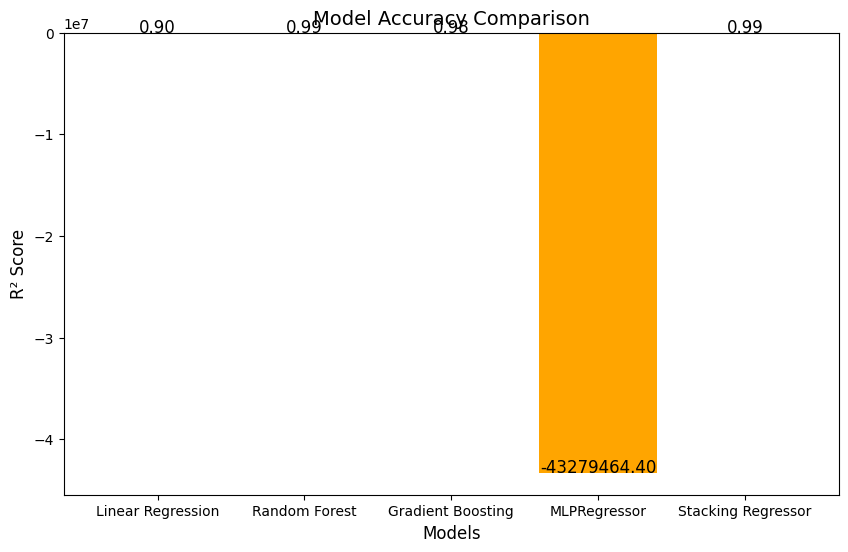

In [53]:
import matplotlib.pyplot as plt

# মডেলগুলির নাম এবং স্কোরের মান
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'MLPRegressor', 'Stacking Regressor']
scores = [linreg_score, rf_score, gbr_score, mlp_score, stacking_score]  # মডেলগুলির R² স্কোর

# গ্রাফ তৈরি করা
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'orange', 'purple'])

# গ্রাফের শিরোনাম এবং লেবেল
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)

# স্কোরগুলোর মান গ্রাফে দেখানো
for i in range(len(models)):
    plt.text(i, scores[i] + 0.01, f'{scores[i]:.2f}', ha='center', fontsize=12)

# গ্রাফ দেখানো
plt.show()


In [55]:
print(df.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [58]:
# Drop rows with NaN values in the target variable
df = df.dropna(subset=['co2'])  # Assuming 'co2' is the target column

# Reassign the features and target
X = df.drop('co2', axis=1)
y = df['co2']

# One-Hot Encoding for categorical features like 'country' and 'iso_code'
X = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
from sklearn.metrics import mean_absolute_error
y_pred = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))


MAE: 8.702507830015994


In [59]:
# Fill NaN values with the median or mean
y = y.fillna(y.median())  # Fill missing values in target with median
X = X.fillna(X.median())  # Fill missing values in features with median

# Reassign the features and target after filling NaN values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))


MAE: 8.486362533745128


In [61]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}


In [62]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)


In [63]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)


In [64]:
# Reduce the size of the data for faster training
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)

random_search.fit(X_train_sample, y_train_sample)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=1)

In [65]:
# Use fewer iterations and folds
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=5, cv=3, verbose=1, n_jobs=-1, random_state=42)


In [66]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# CO₂ emissions over time (example, use your actual time-series data column)
data = df['co2']  # 'co2' should be your target variable for LSTM

# Rescale data to values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Create time-series data (X, y)
def create_time_series_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # For example, using past 10 days to predict next day
X, y = create_time_series_data(data_scaled, time_step)

# Reshaping for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, time_steps, features)


In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer for predicting next value
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


911/911 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 5.0891e-04
Epoch 2/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 2.2878e-04
Epoch 3/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.3334e-04
Epoch 4/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1.2376e-04
Epoch 5/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 8.0671e-05
Epoch 6/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.4296e-04
Epoch 7/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 9.7481e-05
Epoch 8/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.4220e-04
Epoch 9/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1.6401e-04
Epoch 10/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1.3562e-04
Epoch 11/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 9.1457e-05
Epoch 12/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1.4746e-04
Epoch 13/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.3165e-04
Epoch 14/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - l

In [69]:
# Random Forest Model Training
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)  # Fit the model with your training data


RandomForestRegressor()

In [70]:
# Random Forest Model Prediction
rf_output = rf.predict(X_test)  # X_test is your test data


In [73]:
print(X_train_lstm.dtype)
print(y_train.dtype)


object
float64


In [74]:
X_train_lstm = X_train_lstm.astype('float32')
y_train = y_train.astype('float32')


In [75]:
X_train_lstm = X_train_lstm.astype('float32')
y_train = y_train.astype('float32')


In [76]:
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)


Epoch 1/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 306s 472ms/step - loss: 4038254.0000
Epoch 2/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 321s 471ms/step - loss: 3639622.0000
Epoch 3/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 322s 471ms/step - loss: 3491910.2500
Epoch 4/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 323s 472ms/step - loss: 3914592.5000
Epoch 5/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 301s 471ms/step - loss: 3891042.2500
Epoch 6/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 300s 470ms/step - loss: 4316163.0000
Epoch 7/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 300s 471ms/step - loss: 4176514.5000
Epoch 8/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 300s 470ms/step - loss: 3822395.0000
Epoch 9/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 323s 471ms/step - loss: 4057615.5000
Epoch 10/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 322s 471ms/step - loss: 3952180.7500


In [78]:
print(X_test_lstm.dtype)


object


In [79]:
X_test_lstm = X_test_lstm.astype('float32')


In [80]:
import numpy as np

X_test_lstm = np.nan_to_num(X_test_lstm)  # NaN ভ্যালুগুলো 0 দিয়ে পরিবর্তন করবে


In [81]:
print(X_test_lstm.shape)


(8742, 536, 1)


In [82]:
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))


In [83]:
y_pred_lstm = lstm_model.predict(X_test_lstm)


274/274 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step


In [84]:
# Random Forest Prediction
rf_output = rf.predict(X_test)  # RF এর Test Data

# LSTM Prediction
y_pred_lstm = lstm_model.predict(X_test_lstm)


274/274 ━━━━━━━━━━━━━━━━━━━━ 34s 123ms/step


In [85]:
import numpy as np

# একত্রিত করা (Column-wise Concatenation)
combined_output = np.concatenate((rf_output.reshape(-1,1), y_pred_lstm), axis=1)


In [86]:
from xgboost import XGBRegressor

# Final Model Training
final_model = XGBRegressor(n_estimators=100)
final_model.fit(combined_output, y_test)  # y_test = মূল Target Values

# Prediction
final_pred = final_model.predict(combined_output)


In [87]:
from keras.models import Sequential
from keras.layers import Dense

# Define Fusion Model
fusion_model = Sequential()
fusion_model.add(Dense(64, activation='relu', input_shape=(combined_output.shape[1],)))
fusion_model.add(Dense(32, activation='relu'))
fusion_model.add(Dense(1))  # Final Output Layer

# Compile Model
fusion_model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
fusion_model.fit(combined_output, y_test, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1117685.6250
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5052.7964
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7981.8579
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7686.3018
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4193.9487
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6451.7549
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6059.6880
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4624.7051
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5228.7686
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7410.9497


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, final_pred)
mse = mean_squared_error(y_test, final_pred)

print(f"Final Model MAE: {mae}")
print(f"Final Model MSE: {mse}")


Final Model MAE: 39.83510960597569
Final Model MSE: 221676.3156118258


In [90]:
print(df.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [91]:
df['description'] = ["This is a report on CO2 emissions and climate impact."] * len(df)


In [92]:
df['description'] = df['country'] + " has recorded CO2 emissions of " + df['co2'].astype(str) + " metric tons in " + df['year'].astype(str) + "."


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['description'])


In [94]:
import numpy as np
from scipy.sparse import hstack

X_numeric = df.drop(['description', 'country', 'iso_code'], axis=1)  # Non-text features
X_final = hstack([X_numeric, text_features])  # Text + Numeric Feature Combine


In [95]:
!pip install transformers


In [99]:
print(df.columns)  # Check all columns in your DataFrame
print(df['description'].isnull().sum())  # Check NaN values



Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [100]:
print(df['description'].isnull().sum())  # Check NaN values


0


In [101]:
df['description'] = df['description'].fillna('')


In [103]:
import numpy as np
from tqdm import tqdm  # Progress bar

# Convert Series to List
texts = df['description'].fillna('').astype(str).tolist()

# Batch-wise BERT Processing
batch_size = 32
embeddings = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i:i + batch_size]
    tokens = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        output = bert_model(**tokens)

    batch_embeddings = output.last_hidden_state[:, 0, :].cpu().numpy()
    embeddings.append(batch_embeddings)

# Flatten & Save


100%|██████████| 911/911 [31:17<00:00,  2.06s/it]


In [104]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [105]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Ensure GPU is used


Using device: cpu


In [106]:
import numpy as np
import torch
from tqdm import tqdm
from transformers import DistilBertTokenizer, DistilBertModel

# Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)

# Fix NaN and dtype issues
df['description'] = df['description'].fillna('').astype(str)
texts = df['description'].tolist()

# Process in Batches
batch_size = 32
embeddings = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i:i + batch_size]
    tokens = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        output = bert_model(**tokens)

    batch_embeddings = output.last_hidden_state[:, 0, :].cpu().numpy()
    embeddings.append(batch_embeddings)

# Flatten & Save
df['bert_embedding'] = list(np.vstack(embeddings))


100%|██████████| 911/911 [15:45<00:00,  1.04s/it]


In [107]:
import matplotlib.pyplot as plt

# Check if 'history' exists (avoid errors)
if 'history' in locals():
    plt.figure(figsize=(8, 5))

    # Plot Training & Validation Loss
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')

    # Labels & Title
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('LSTM Model Training Progress', fontsize=14)
    plt.legend()

    # Grid for better visualization
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show Plot
    plt.show()
else:
    print("Error: 'history' object not found! Make sure to train the model first.")


Error: 'history' object not found! Make sure to train the model first.


In [109]:
print(lstm_model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 536, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

None


In [113]:
# Feature selection for LSTM (এইখানে তোমার প্রয়োজনীয় numeric features রাখো)
features = ['gdp', 'co2', 'co2_per_capita', 'population', 'temperature_change_from_co2']  # Example

X_lstm = df[features].values  # Convert DataFrame to NumPy array
y = df['co2']  # Target variable


In [114]:
print(X_lstm.shape, y.shape)  # Data dimensions ঠিক আছে?


(29137, 5) (29137,)


In [115]:
print(df.columns)  # Available columns দেখো


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [116]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train_lstm, X_val_lstm, y_train, y_val = train_test_split(
    X_lstm, y, test_size=0.2, random_state=42
)


In [118]:
# Reshaping X_lstm to 3D shape (num_samples, time_steps, num_features)
X_lstm = X_lstm.reshape((X_lstm.shape[0], 1, X_lstm.shape[1]))  # Adding a time-step dimension (1 step)


In [119]:
print(X_train_lstm.shape)  # Output should be (num_samples, time_steps, num_features)


(23309, 5)


In [122]:
print(X_train_lstm.shape)


(23309, 5)


In [123]:
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))  # Adding 1 time-step dimension
X_val_lstm = X_val_lstm.reshape((X_val_lstm.shape[0], 1, X_val_lstm.shape[1]))  # Same for validation data


In [124]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # Adjust input_shape
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_val_lstm, y_val)
)


Epoch 1/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: nan - val_loss: nan
Epoch 2/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: nan - val_loss: nan
Epoch 3/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: nan - val_loss: nan
Epoch 5/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan


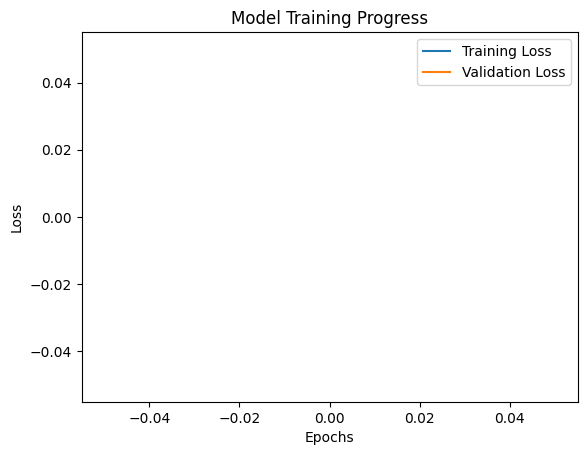

In [126]:
# Training and validation loss plot
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Progress')
plt.show()


In [129]:
print(X_train_lstm.shape)


(23309, 1, 5)


In [133]:
print(X_test_lstm.shape)


(8742, 536, 1)


In [134]:
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])


In [135]:

import numpy as np

# Create a new X_test_lstm with 5 features (e.g., replicating the single feature 5 times)
X_test_lstm_5_features = np.repeat(X_test_lstm, 5, axis=-1)  # Axis=-1 means repeat along the last dimension (features)

# Now X_test_lstm_5_features shape will be (8742, 536, 5)
print(X_test_lstm_5_features.shape)


(8742, 1, 2680)


In [142]:
print(X_test_lstm.shape)  # This will show the shape of your data


(8742, 1, 536)


In [144]:
# Check if the total number of elements is divisible by 536
total_elements = X_train_lstm.shape[0] * X_train_lstm.shape[1]  # Total elements in the dataset
if total_elements % 536 == 0:
    X_train_lstm = X_train_lstm.reshape(-1, 1, 536)
    X_test_lstm = X_test_lstm.reshape(-1, 1, 536)
else:
    print(f"Cannot reshape, total elements {total_elements} is not divisible by 536")


Cannot reshape, total elements 23309 is not divisible by 536


In [146]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)


(23309, 1, 5)
(8742, 1, 536)


In [148]:
import numpy as np

desired_feature_size = 536  # Desired number of features for each sample

# 1. Check the current shape
print(f"Original X_train_lstm shape: {X_train_lstm.shape}")
print(f"Original X_test_lstm shape: {X_test_lstm.shape}")

# 2. Padding or truncating the training set
if X_train_lstm.shape[2] < desired_feature_size:
    padding_size = desired_feature_size - X_train_lstm.shape[2]
    X_train_lstm = np.pad(X_train_lstm, ((0, 0), (0, 0), (0, padding_size)), 'constant')
    print(f"Padded X_train_lstm shape: {X_train_lstm.shape}")
elif X_train_lstm.shape[2] > desired_feature_size:
    X_train_lstm = X_train_lstm[:, :, :desired_feature_size]
    print(f"Truncated X_train_lstm shape: {X_train_lstm.shape}")

# 3. Padding or truncating the test set
if X_test_lstm.shape[2] < desired_feature_size:
    padding_size = desired_feature_size - X_test_lstm.shape[2]
    X_test_lstm = np.pad(X_test_lstm, ((0, 0), (0, 0), (0, padding_size)), 'constant')
    print(f"Padded X_test_lstm shape: {X_test_lstm.shape}")
elif X_test_lstm.shape[2] > desired_feature_size:
    X_test_lstm = X_test_lstm[:, :, :desired_feature_size]
    print(f"Truncated X_test_lstm shape: {X_test_lstm.shape}")

# 4. Finally, reshape the data for LSTM if necessary
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, desired_feature_size)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, desired_feature_size)

print(f"Reshaped X_train_lstm shape: {X_train_lstm.shape}")
print(f"Reshaped X_test_lstm shape: {X_test_lstm.shape}")


Original X_train_lstm shape: (23309, 1, 5)
Original X_test_lstm shape: (8742, 1, 536)
Padded X_train_lstm shape: (23309, 1, 536)
Reshaped X_train_lstm shape: (23309, 1, 536)
Reshaped X_test_lstm shape: (8742, 1, 536)


In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# Assuming input shape is (1, 536) for each sample
model.add(LSTM(200, input_shape=(1, 536)))  # 200 units in the LSTM
model.add(Dense(1))  # Output layer, assuming a regression task

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: nan - val_loss: nan
Epoch 2/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: nan - val_loss: nan
Epoch 3/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan
Epoch 4/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan
Epoch 5/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 6/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 7/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: nan - val_loss: nan
Epoch 8/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 9/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 10/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: nan - val_loss: nan


In [154]:
!pip install gtts


In [155]:
from gtts import gTTS
import os

text = "Hello, this is a test of text-to-speech functionality!"
tts = gTTS(text=text, lang='en')
tts.save("test.mp3")
os.system("start test.mp3")  # This will play the saved audio file


32512

In [157]:
!pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 16.9 MB/s eta 0:00:00


In [160]:
!apt-get install -y portaudio19-dev
!pip install pyaudio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (134 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [166]:
import os

# ফাইলের পাথ চেক করতে
print(os.listdir('/content/'))


['.config', 'test.mp3', 'co2-data-master.zip', 'co2-data-master', 'sample_data']


In [168]:
!pip install pydub


In [169]:
from pydub import AudioSegment

# MP3 ফাইল লোড করা
audio = AudioSegment.from_mp3('/content/test.mp3')

# WAV ফরম্যাটে সেভ করা
audio.export("/content/test.wav", format="wav")

# রেকগনাইজার ব্যবহার করে WAV ফাইলটি পড়া
import speech_recognition as sr

recognizer = sr.Recognizer()
audio_file = '/content/test.wav'

# অডিও ফাইল লোড করা
with sr.AudioFile(audio_file) as source:
    audio = recognizer.record(source)  # পুরো অডিও রেকর্ড করা

# অডিও থেকে টেক্সট রিকগনাইজ করা
try:
    text = recognizer.recognize_google(audio)
    print(f"Recognized text: {text}")
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand the audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")


Recognized text: hello this is a test of text-to-speech functionality


In [171]:
import os
print(os.listdir())


['.config', 'test.mp3', 'co2-data-master.zip', 'test.wav', 'co2-data-master', 'sample_data']


In [173]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('co2-data-master.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/co2-data-master')

# Check the contents
import os
print(os.listdir('/content/co2-data-master'))


['co2-data-master']


In [175]:
import os

# List the contents of the unzipped folder
unzipped_files = os.listdir('/content/co2-data-master')
print(unzipped_files)


['co2-data-master']


In [176]:
# List the contents of the 'co2-data-master' folder
unzipped_subfiles = os.listdir('/content/co2-data-master/co2-data-master')
print(unzipped_subfiles)


['owid-co2-data.csv', '.gitignore', 'README.md', 'owid-co2-codebook.csv']


In [177]:
# Dataset লোড করা
data = pd.read_csv('/content/co2-data-master/co2-data-master/owid-co2-data.csv')

# Dataset এর প্রথম 5 টা সারি দেখানো
print(data.head())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

In [178]:
import pandas as pd

# Dataset লোড করা
data = pd.read_csv('/content/co2-data-master/co2-data-master/owid-co2-data.csv')

# Dataset এর প্রথম 5টি সারি দেখানো
print(data.head())

# Dataset এর সারাংশ দেখা
print(data.info())

# Missing value গুলি দেখা
print(data.isnull().sum())

# Statistical summary
print(data.describe())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

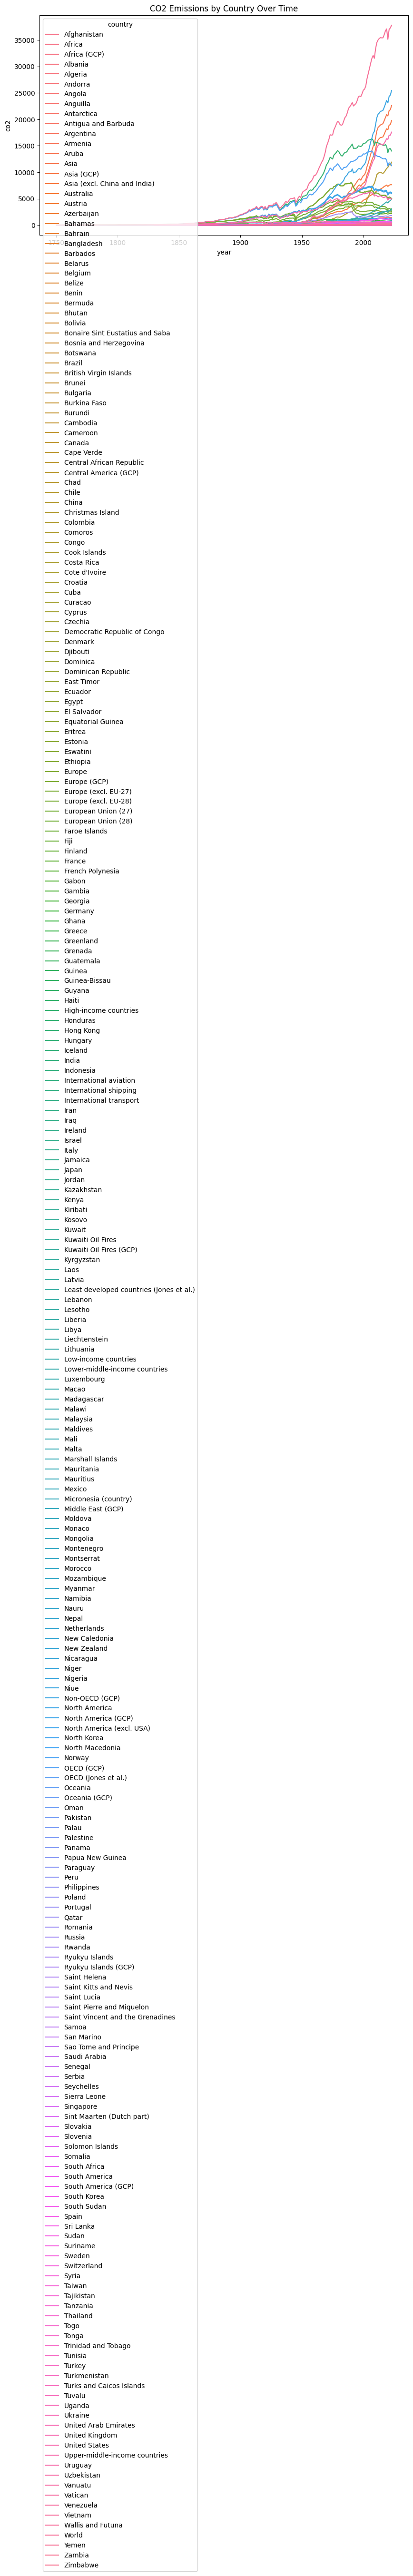

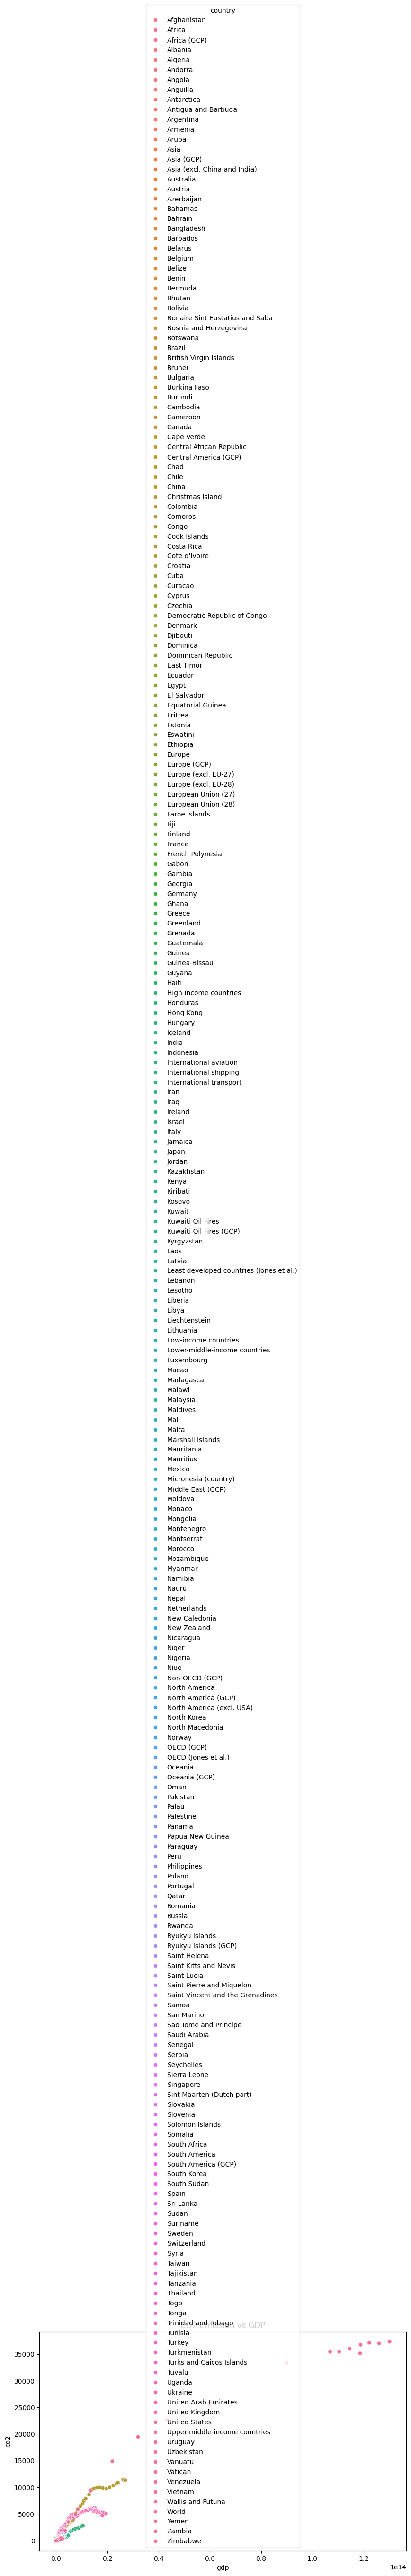

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# CO2 emission এর জন্য একটি গ্রাফ তৈরি করা
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="year", y="co2", hue="country")
plt.title('CO2 Emissions by Country Over Time')
plt.show()

# CO2 emission এর সাথে GDP এর সম্পর্ক দেখানো
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="gdp", y="co2", hue="country")
plt.title('CO2 Emission vs GDP')
plt.show()


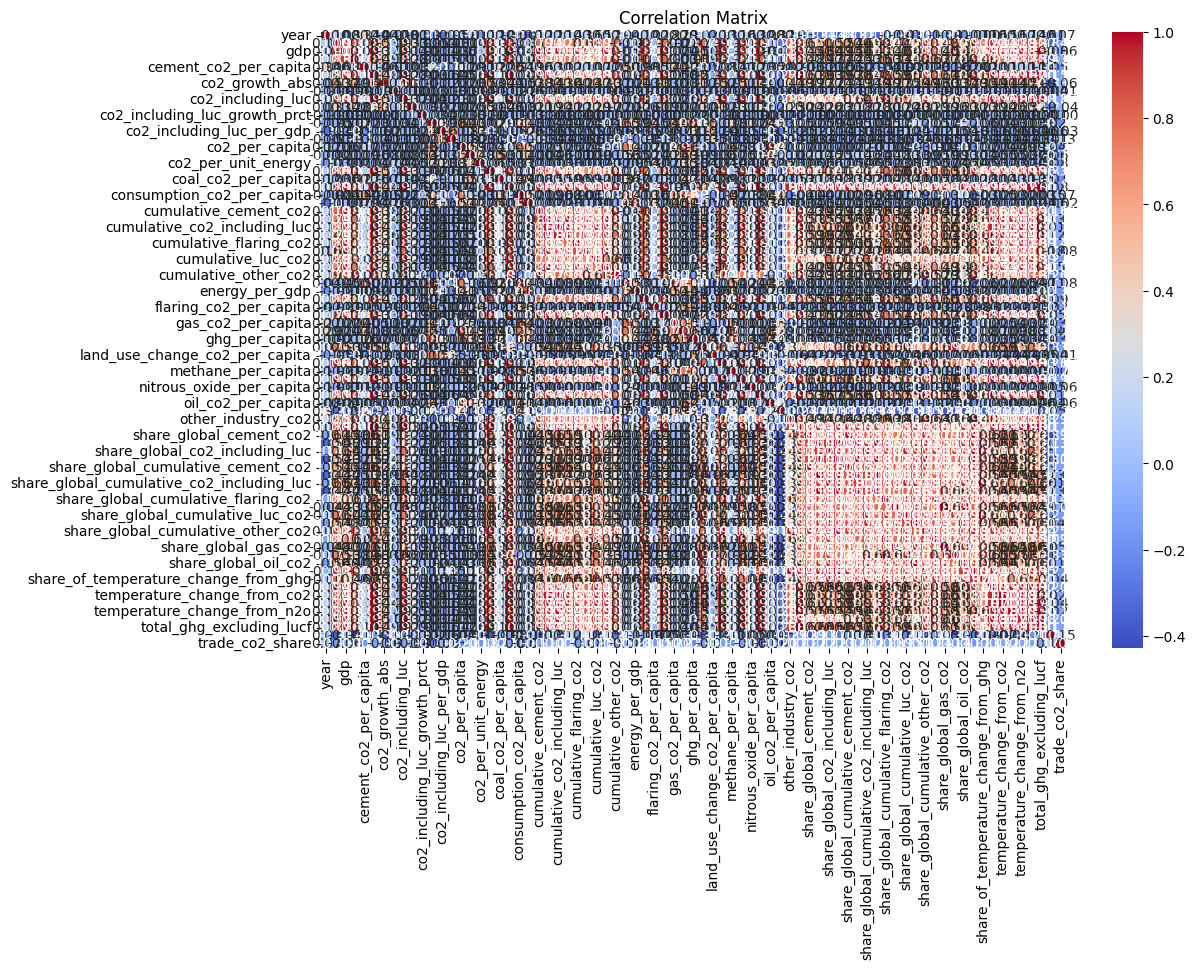

In [181]:
# শুধু সংখ্যাগত (numerical) কলামগুলো নির্বাচন করা
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix তৈরি করা
corr_matrix = numerical_data.corr()

# Correlation heatmap তৈরি করা
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [183]:
# Dataset এর কলামগুলো চেক করা
print(data.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

<ipython-input-184-f7c6e3c37aa0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x="gdp", y="co2", palette='viridis')  # No hue, just gdp and co2


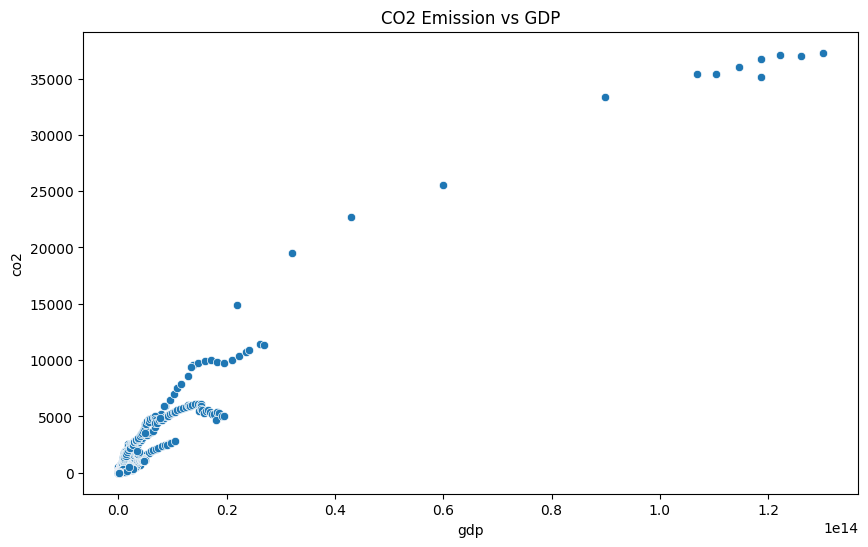

In [184]:
# CO2 emissions vs GDP
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="gdp", y="co2", palette='viridis')  # No hue, just gdp and co2
plt.title('CO2 Emission vs GDP')
plt.show()


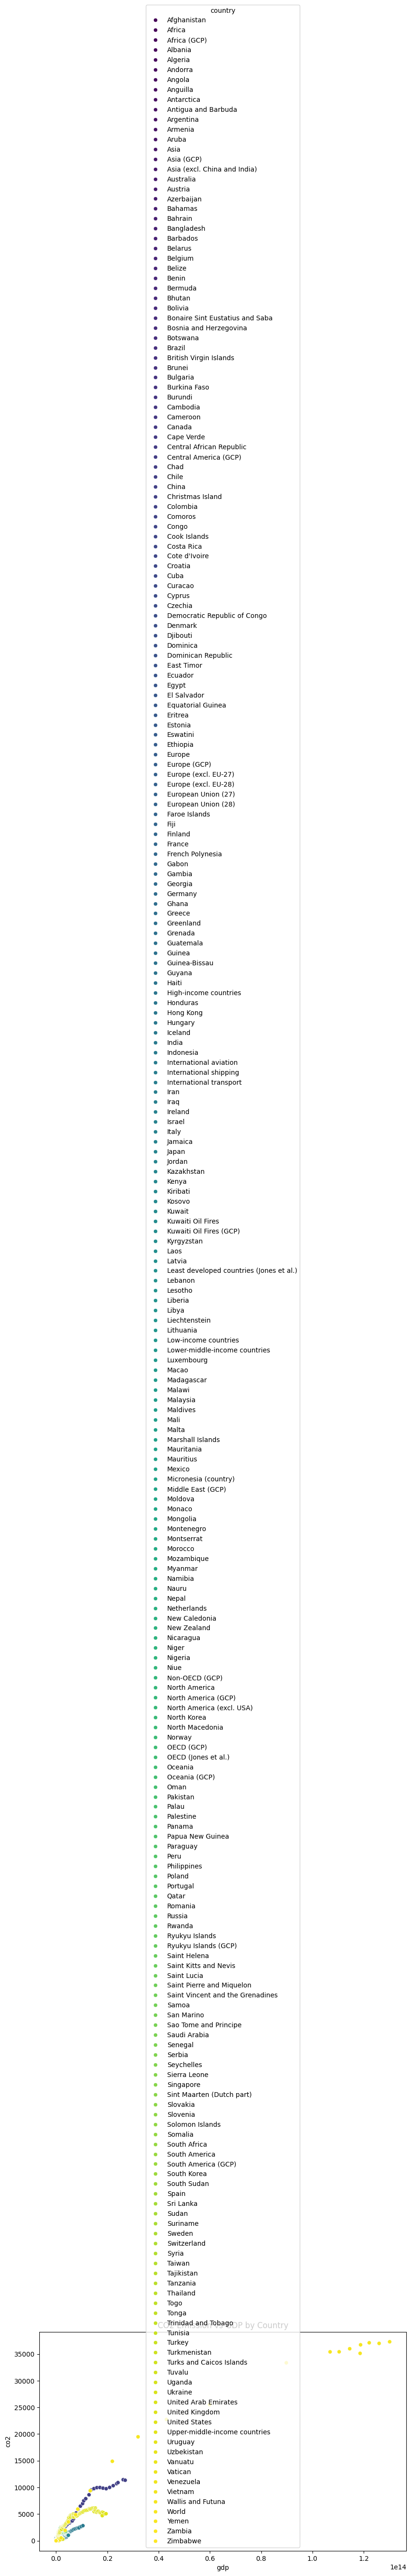

In [185]:
# CO2 emissions vs GDP with country as hue
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="gdp", y="co2", hue="country", palette='viridis')  # Use country as hue
plt.title('CO2 Emission vs GDP by Country')
plt.show()
